# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_combined= pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
df_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice.
len(df_combined["Mouse ID"].unique())

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_ids=df_combined.loc[df_combined.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_ids

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean=df_combined[df_combined["Mouse ID"].isin(dup_ids)==False]
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
# Checking the number of mice in the clean DataFrame.
len(df_clean["Mouse ID"].unique())

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

d_mean = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
d_median = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
d_var = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
d_stdev = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
d_sem = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

t_summary = {"Mean Tumor Volume" : d_mean, "Median Tumor Volume" : d_median, "Tumor Volume Variance" : d_var, "Tumor Volume Std. Dev." : d_stdev, "Tumor Volume Std. Err." : d_sem}
t_summary = pd.DataFrame(t_summary)
t_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

s_table = df_clean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
s_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

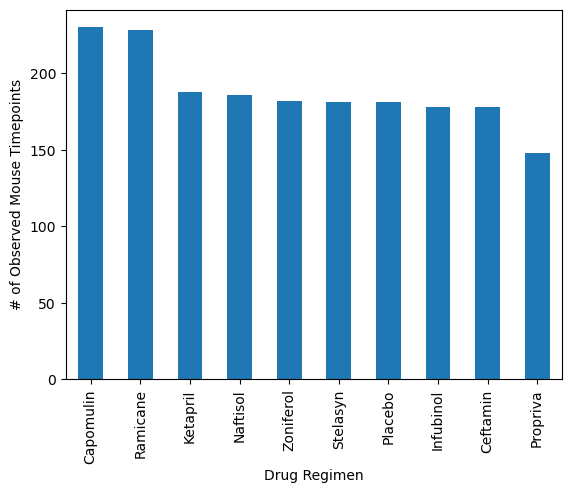

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
results = df_clean["Drug Regimen"].value_counts()
results.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

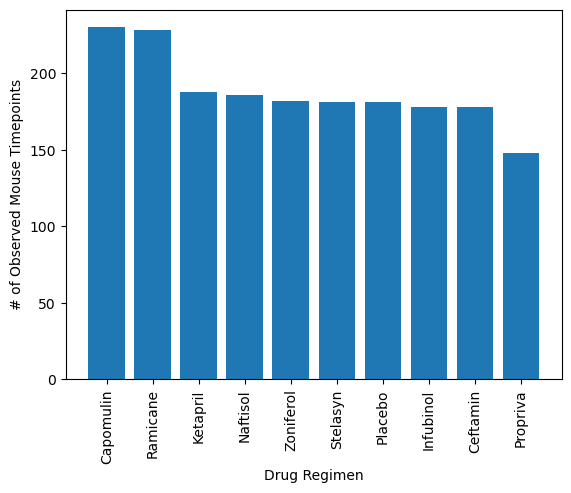

In [40]:
%matplotlib inline
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(results.index.values,results.values)
plt.xticks(rotation= 90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

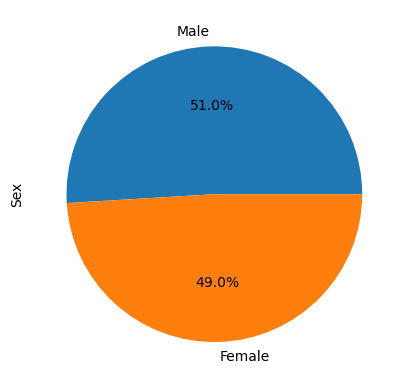

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
results = df_clean.Sex.value_counts()
results.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

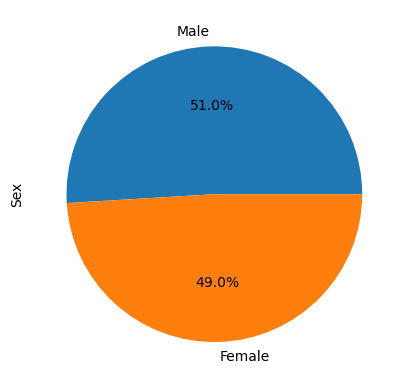

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
results = df_clean.Sex.value_counts()
plt.pie(results.values, labels= results.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
g_timepoint = df_clean.groupby("Mouse ID")["Timepoint"].max()
g_timepoint = g_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_merge = g_timepoint.merge(df_clean, on = ['Mouse ID', 'Timepoint'], how = 'left')
df_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
dt_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in dt_list:
    final_tumor_vol = df_combined.loc[df_combined["Drug Regimen"] == drug, 'Tumor Volume (mm3)']            
        
    # add subset 
    tumor_list.append(final_tumor_vol)
    

# Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    potential_outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) |  (final_tumor_vol > upper_bound)]
    
    print(f"The lower quartile of drug is: {lowerq}")
    print(f"The upper quartile of final_tumor_vol is: {upperq}")
    print(f"The interquartile range of final_tumor_vol is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"The potential outliers for {drug} are: {potential_outliers}")

The lower quartile of drug is: 37.685932865
The upper quartile of final_tumor_vol is: 45.0
The interquartile range of final_tumor_vol is: 7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
The potential outliers for Capomulin are: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of drug is: 36.674634585
The upper quartile of final_tumor_vol is: 45.0
The interquartile range of final_tumor_vol is: 8.325365415
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
The potential outliers for Ramicane are: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of drug is: 47.3123533
The upper quartile of final_tumor_vol is: 57.314443967500004
The interquartile range of final_tumor_vol is: 10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
The potenti

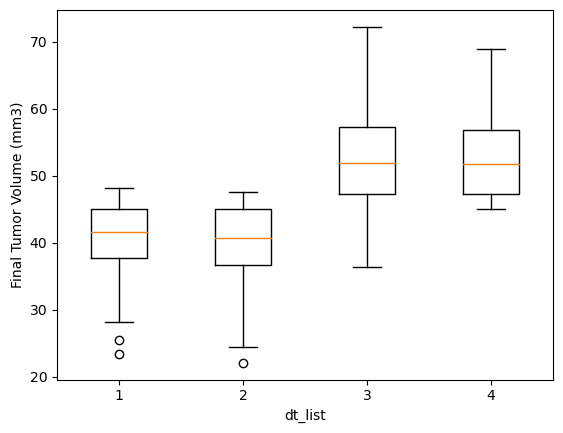

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('dt_list')
plt.show()

## Line and Scatter Plots

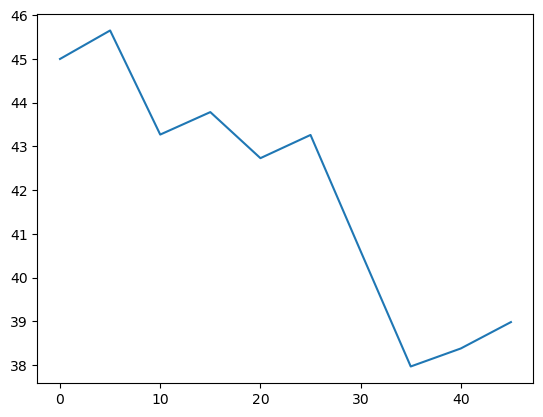

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = df_combined.loc[df_combined['Drug Regimen']=='Capomulin']
mouse_id = capomulin.loc[capomulin['Mouse ID']=='b128']
single_mouse = plt.plot(mouse_id['Timepoint'], mouse_id['Tumor Volume (mm3)']) 
plt.show()

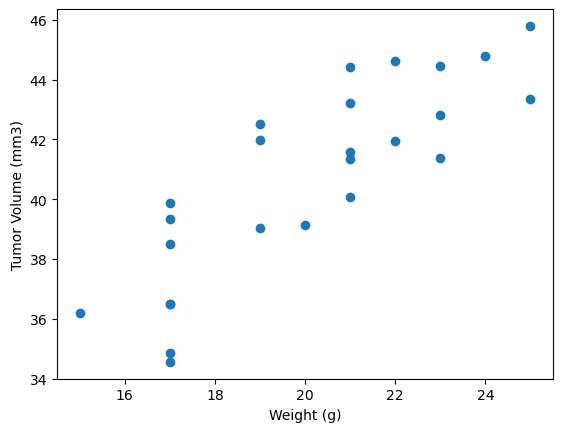

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor = capomulin.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
scatter_plot = plt.scatter(avg_tumor['Weight (g)'], avg_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor = capomulin.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
(slope, interept, rvalue, pvalue, stderr) = lineregress(capomulin['Weight (g)'],avg_tumor)
line_q = "y =" + str(round(slope,2)) + "x +" str(round(intercept,2))
scatter_plot = plt.scatter(avg_tumor['Weight (g)'], avg_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

SyntaxError: invalid syntax (1961427544.py, line 5)